In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [29]:
#[:, 0]: 1차원배열 -> 2차원배열로 바꿔줘야함
# X = dataset.iloc[:, 0].values
# X = X.reshape(len(X), 1)

X = dataset.iloc[:, :-1].values
y = dataset.loc[:, 'pass'].values

In [30]:
X.shape, y.shape

((20, 1), (20,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape

((16, 1), (4, 1))

In [33]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
logistic.predict([[6], [4]]) #합격, 불합격

array([1, 0])

In [35]:
logistic.predict_proba([[6]])  #불합격/합격 확률

array([[0.141483, 0.858517]])

In [36]:
logistic.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [37]:
y_pred = logistic.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1]), array([1, 0, 1, 0]))

In [38]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [39]:
logistic.score(X_test, y_test)

0.75

In [40]:
def model_logistic():
    import pandas as pd
    dataset = pd.read_csv('data/LogisticRegressionData.csv')

    X=dataset.iloc[:, :-1].values
    y=dataset.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)

    return logistic

In [41]:
model = model_logistic()
hour = 3.5
model.predict([[hour]])
model.predict_proba([[hour]])

array([[0.74822448, 0.25177552]])

In [42]:
def predict(hour):
    model = model_logistic()
    pred = model.predict([[hour]])
    pred_proba = model.predict_proba([[hour]])

    if pred[0]==0:
        result = '불합격'

    else:
        result = '합격'

    print(f'{hour}시간 공부한경우 {result}입니다.')
    print(f'합격확률:{pred_proba[0][1]*100:.2f}%, 불합격확률:{pred_proba[0][0]*100:.2f}%')


In [43]:
predict(4.2)

4.2시간 공부한경우 불합격입니다.
합격확률:43.06%, 불합격확률:56.94%


In [44]:
import numpy as np
max = np.ceil(np.max(X_train))  #올림
min = np.floor(np.min(X_train))  #내림

X_range = np.arange(min, max, 0.1)
X_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [45]:
#p = 1/1(1 + e^(-y)) (y = mx+b)
y = logistic.coef_ * X_range + logistic.intercept_
P = 1 / (1 + np.exp(-y))
cols = P.shape[1]
p = P.reshape(cols, 1)

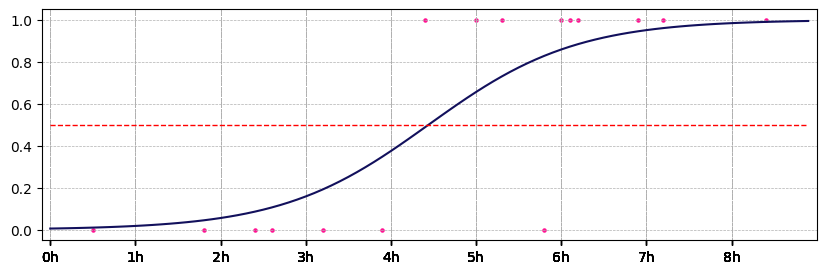

In [46]:
plt.figure(figsize=(10, 3))
plt.scatter(X_train, y_train, s=5, c='deeppink')
# plt.plot(X_range, p, c="#00FFD0")
plt.plot(X_range, p, c="#12105C")

plt.plot(X_range, [0.5]*len(X_range), color='red', ls='--', lw=1)  #np.full(len(X_range), 0.5)

plt.xlim(min-0.1, max)
# xticks = [x for x in range(int(min), int(max)+1, 1)]
xticks = [int(x) for x in X_range]
plt.xticks(xticks, [f"{x}h" for x in xticks])

plt.grid(True, lw=0.5, ls='--')

plt.show()

In [47]:
import numpy as np
max = np.ceil(np.max(X_test))  #올림
min = np.floor(np.min(X_test))  #내림

X_range = np.arange(min, max, 0.1)
X_range

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

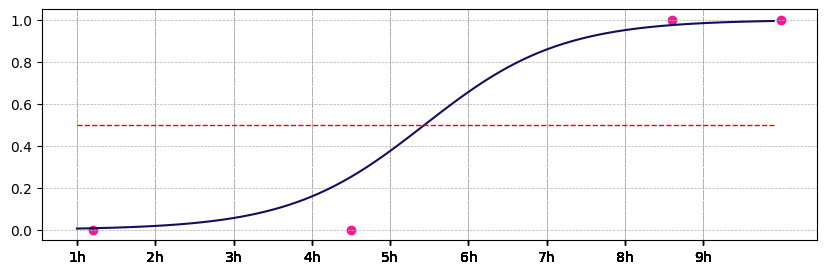

In [48]:
plt.figure(figsize=(10, 3))
plt.scatter(X_test, y_test, c='deeppink')
plt.plot(X_range, p, c="#12105C")

plt.plot(X_range, [0.5]*len(X_range), color='red', ls='--', lw=1)  #np.full(len(X_range), 0.5)

# plt.xlim(min-0.1, max)
xticks = [int(x) for x in X_range]
plt.xticks(xticks, [f"{x}h" for x in xticks])

plt.grid(True, lw=0.5, ls='--')

plt.show()

In [49]:
import numpy as np
for hour in np.arange(4.0, 5.0, 0.1):
    pred = logistic.predict([[hour]])
    print(f'{hour:.1f}: {pred[0]}')

4.0: 0
4.1: 0
4.2: 0
4.3: 0
4.4: 0
4.5: 1
4.6: 1
4.7: 1
4.8: 1
4.9: 1


In [50]:
df = pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [ ]:
X = df[['hour']].values
X

In [52]:
y_pred = logistic.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
df['pass'] = y_pred
df['합격여부'] = df['pass'].apply(lambda x: '합격' if x==1 else '불합격')

ValueError: Length of values (20) does not match length of index (5)

In [ ]:
df

,name,hour,pass,합격여부
0,홍길동,4.2,0,불합격
1,강감찬,5.1,1,합격
2,이순신,4.5,1,합격
3,성춘향,7.2,1,합격


In [ ]:
import numpy as np
x_range = np.arange(0, 10.1, 0.1)
x_range

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
#y = mx + b
y = logistic.coef_*x_range + logistic.intercept_
p = 1/(1+np.exp(-y))
y_range = p.reshape(p.shape[1], 1)

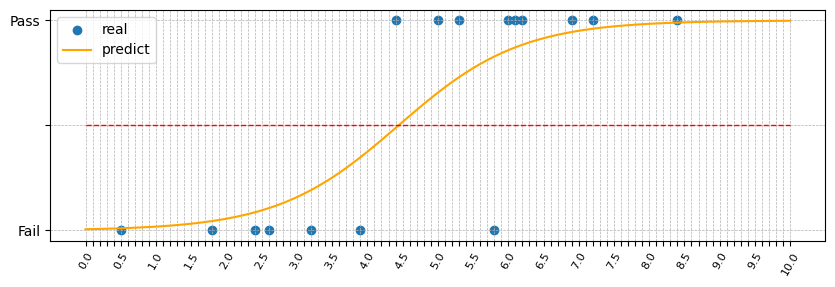

In [ ]:
plt.figure(figsize=(10, 3))
plt.scatter(X_train, y_train, label='real')
plt.plot(x_range, y_range, color='orange', label='predict')
plt.plot(x_range, [0.5]*len(x_range), color='red', ls='--', lw=1)  #np.full(len(x_range), 0.5)
plt.grid(True, ls='--', lw=0.5)

xticks = [x for x in np.arange(0, 10.1, 0.1)]
xlabel = [x if x%0.5 == 0 else '' for x in xticks]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)

yticks = [0, 0.5, 1]
plt.yticks(yticks, ['Fail', '', 'Pass'])

plt.legend()
plt.show()

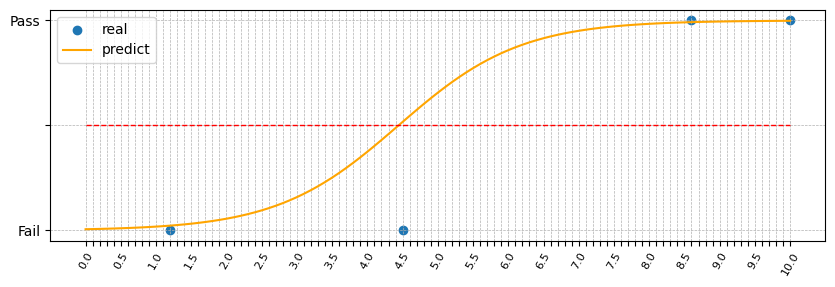

In [ ]:
plt.figure(figsize=(10, 3))
plt.scatter(X_test, y_test, label='real')
plt.plot(x_range, y_range, color='orange', label='predict')
plt.plot(x_range, [0.5]*len(x_range), color='red', ls='--', lw=1)  #np.full(len(x_range), 0.5)
plt.grid(True, ls='--', lw=0.5)

xticks = [x for x in np.arange(0, 10.1, 0.1)]
xlabel = [x if x%0.5 == 0 else '' for x in xticks]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)

yticks = [0, 0.5, 1]
plt.yticks(yticks, ['Fail', '', 'Pass'])

plt.legend()
plt.show()

In [ ]:
y_pred = logistic.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1]), array([1, 0, 1, 0]))

In [ ]:
y_pred = logistic.predict(X_train)
y_pred, y_train

(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]))

In [ ]:
y_pred = logistic.predict(X_test)

from sklearn.metrics import confusion_matrix  #혼동행렬
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]])

In [ ]:
#맞은 개수
true = cm[0, 0]+cm[1, 1]
print(f'정답수: {true}')

정답수: 3


In [ ]:
y_pred = logistic.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]])

In [ ]:
true = cm[0, 0]+cm[1, 1]
print(f'정답수: {true}')

정답수: 14


In [ ]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

y_pred = logistic.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y, y_pred)
cm

array([[ 7,  2],
       [ 1, 10]])

In [ ]:
logistic.score(X,y), 17/20

(0.85, 0.85)

In [ ]:
df = dataset.copy()
df['predict'] = y_pred

#예측 틀린것만 필터링
filt = df['pass']!=df['predict']
df[filt]

,hour,pass,predict
7,4.4,1,0
8,4.5,0,1
11,5.8,0,1


In [ ]:
import pandas as pd
df= pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [ ]:
X=df.loc[:, '공부시간'].values
X2 = X.reshape(len(X), 1)
X2.shape

(5, 1)

In [ ]:
pred = logistic.predict(X2)
df['pass']=pred
df['합격예상']=df['pass'].apply(lambda x:'합격' if x==1 else '불합격')

pred_proba = logistic.predict_proba(X2)
pass_proba = [f'{y[1]*100:.2f}%' for y in pred_proba]  #f'{pred_proba[: ,1]*100:.2f}%'
df['예상합격률'] = pass_proba
df.drop(columns='pass', inplace=True)
df

,이름,공부시간,합격예상,예상합격률
0,홍길동,4.2,불합격,43.06%
1,강감찬,5.1,합격,68.18%
2,이순신,4.5,합격,51.69%
3,성춘향,7.2,합격,96.05%
4,이몽룡,2.8,불합격,13.02%
